# **1. Import libraries** <a class="anchor" id="1"></a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve , auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings("ignore")

# **2. Import dataset** <a class="anchor" id="21"></a>


In [2]:
data = pd.read_excel("C:/Users/MAS/Datasets/SKILICARSLAN_Anemia_DataSet.xlsx")
df = pd.DataFrame(data)

In [3]:
df.head()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,SDTSD,TSD,FERRITTE,FOLATE,B12,All_Class,HGB_Anemia_Class,Iron_anemia_Class,Folate_anemia_class,B12_Anemia_class
0,1,10.63,6.31,2.79,0.91,0.56,0.06,4.31,12.7,37.6,...,248.90,40.176778,194.00,5.06,178.2,4,0,0,0,1
1,1,5.08,2.50,1.87,0.43,0.26,0.02,4.34,12.8,36.9,...,348.48,33.482553,57.37,9.88,197.7,4,0,0,0,1
2,1,13.68,9.40,2.69,1.55,0.03,0.01,3.18,9.4,27.5,...,357.27,20.144429,114.20,8.37,143.0,4,0,0,0,1
3,1,5.60,3.94,0.83,0.54,0.26,0.03,3.35,10.5,31.4,...,360.60,27.731559,214.20,6.39,139.9,4,0,0,0,1
4,1,3.57,2.03,1.25,0.10,0.18,0.01,1.31,5.1,14.3,...,223.28,78.860623,303.40,4.30,50.0,4,0,0,0,1


# **3. EDA** <a class="anchor" id="21"></a>


In [4]:
df.shape

(15300, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15300 entries, 0 to 15299
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GENDER               15300 non-null  int64  
 1   WBC                  15300 non-null  float64
 2   NE#                  15300 non-null  float64
 3   LY#                  15300 non-null  float64
 4   MO#                  15300 non-null  float64
 5   EO#                  15300 non-null  float64
 6   BA#                  15300 non-null  float64
 7   RBC                  15300 non-null  float64
 8   HGB                  15300 non-null  float64
 9   HCT                  15300 non-null  float64
 10  MCV                  15300 non-null  float64
 11  MCH                  15300 non-null  float64
 12  MCHC                 15300 non-null  float64
 13  RDW                  15300 non-null  float64
 14  PLT                  15300 non-null  float64
 15  MPV                  15300 non-null 

In [6]:
df.isnull().sum()

GENDER                 0
WBC                    0
NE#                    0
LY#                    0
MO#                    0
EO#                    0
BA#                    0
RBC                    0
HGB                    0
HCT                    0
MCV                    0
MCH                    0
MCHC                   0
RDW                    0
PLT                    0
MPV                    0
PCT                    0
PDW                    0
SD                     0
SDTSD                  0
TSD                    0
FERRITTE               0
FOLATE                 0
B12                    0
All_Class              0
HGB_Anemia_Class       0
Iron_anemia_Class      0
Folate_anemia_class    0
B12_Anemia_class       0
dtype: int64

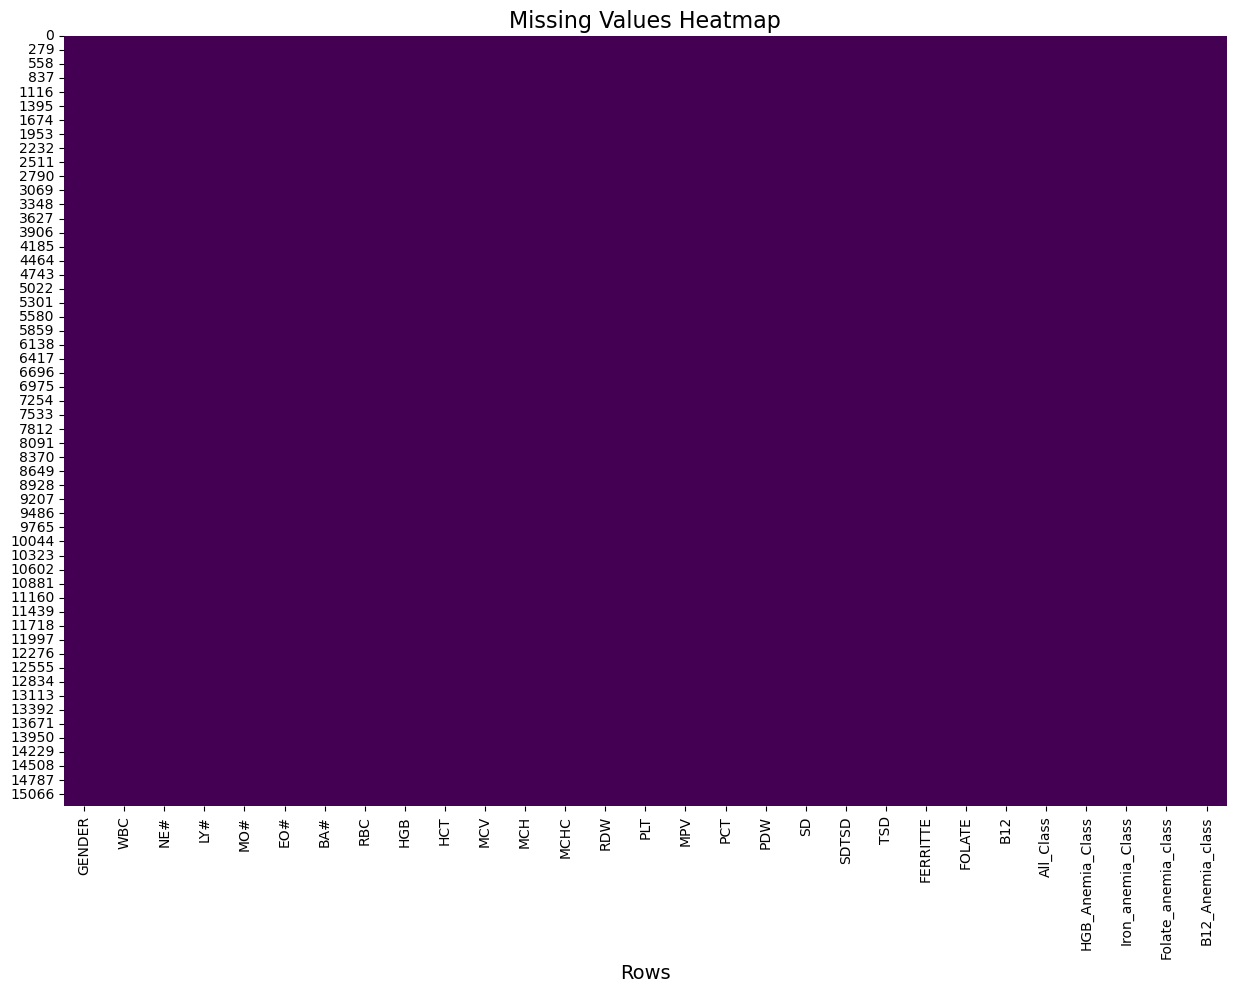

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap='viridis' ,cbar=False)
plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Columns' , fontsize = 14)
plt.xlabel('Rows' , fontsize = 14)
plt.show()

In [8]:
dupli= df.duplicated().sum()
dupli

88

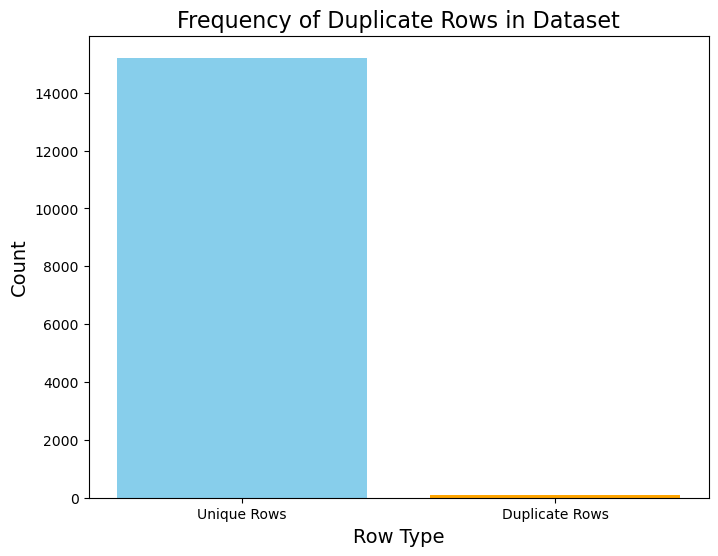

In [9]:
# Plotting duplicates
plt.figure(figsize=(8, 6))
plt.bar(['Unique Rows', 'Duplicate Rows'], [len(df) - dupli, dupli], color=['skyblue', 'orange'])
plt.title('Frequency of Duplicate Rows in Dataset', fontsize=16)
plt.xlabel('Row Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [10]:
df_cleaned= df.drop_duplicates(inplace=True)
dup =df.duplicated().sum()
dup

0

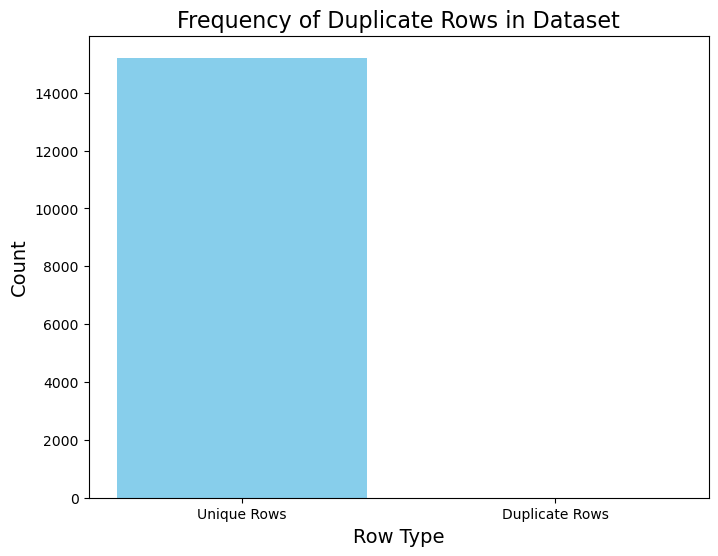

In [11]:
# Plotting duplicates
plt.figure(figsize=(8, 6))
plt.bar(['Unique Rows', 'Duplicate Rows'], [len(df) - dup, dup], color=['skyblue', 'orange'])
plt.title('Frequency of Duplicate Rows in Dataset', fontsize=16)
plt.xlabel('Row Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [12]:
df.describe()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,SDTSD,TSD,FERRITTE,FOLATE,B12,All_Class,HGB_Anemia_Class,Iron_anemia_Class,Folate_anemia_class,B12_Anemia_class
count,15212.000000,15212.000000,15212.000000,15212.000000,15212.000000,15212.000000,15212.000000,15212.000000,15212.000000,15212.000000,...,15212.000000,15212.000000,15212.000000,15212.000000,15212.000000,15212.000000,15212.000000,15212.000000,15212.000000,15212.000000
mean,0.320668,8.086358,5.053026,2.241889,0.570958,0.156013,0.064893,4.689300,12.778468,38.951800,...,356.178570,20.203624,128.789092,8.656020,392.142704,0.697673,0.066724,0.274454,0.009992,0.013016
std,0.466749,4.358563,3.483828,1.870699,0.318176,0.199504,0.223686,0.663444,2.100526,5.608935,...,83.414137,12.979820,406.985216,3.736083,445.845984,0.987949,0.249551,0.446254,0.099463,0.113347
min,0.000000,0.570000,0.030000,0.110000,0.000000,0.000000,0.000000,0.870000,2.990000,7.210000,...,41.110000,1.287001,0.500000,0.550000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.100000,3.390000,1.640000,0.411950,0.060000,0.040000,4.320000,11.600000,35.700000,...,309.000000,10.869565,14.117500,6.140000,230.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.480000,4.410000,2.120000,0.530000,0.120000,0.054000,4.700000,12.820000,39.130000,...,359.450000,17.948493,40.025000,7.990000,308.100000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.210000,5.870000,2.640000,0.670000,0.200000,0.080000,5.080000,14.100000,42.472500,...,409.000000,26.491974,105.900000,10.370000,431.025000,2.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,246.700000,197.200000,89.600000,18.510000,9.410000,24.730000,7.500000,22.450000,67.400000,...,947.270000,100.000000,27332.000000,50.250000,33880.000000,4.000000,1.000000,1.000000,1.000000,1.000000


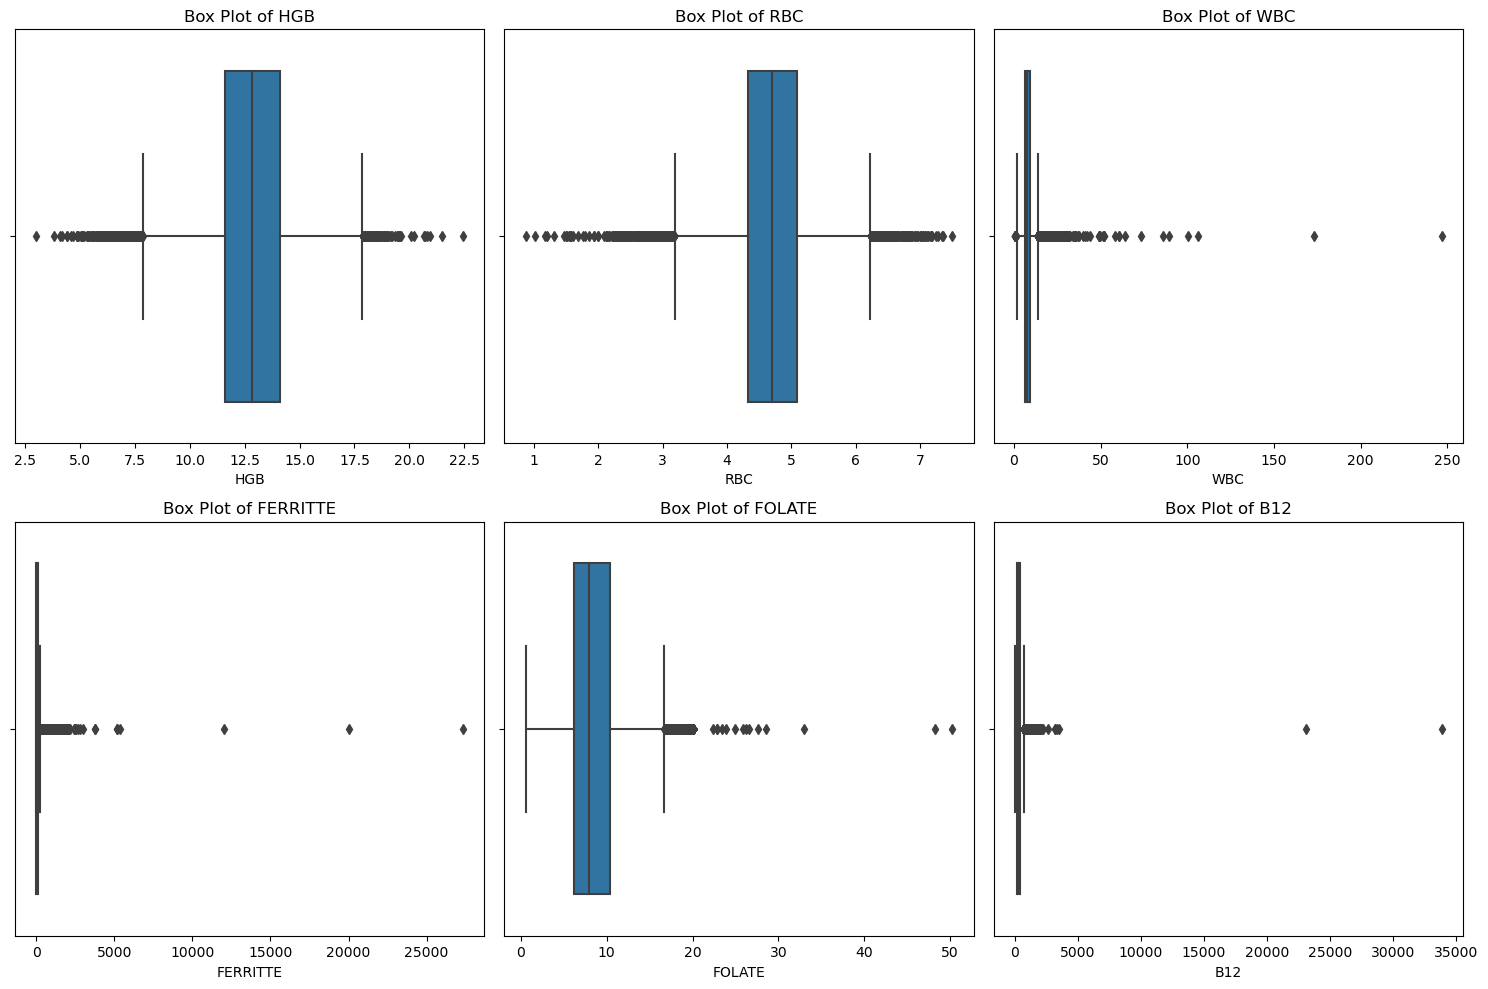

In [13]:
# Selecting a few key features for histograms
features_to_plot = ['HGB', 'RBC', 'WBC', 'FERRITTE', 'FOLATE', 'B12']
# Creating box plots for the selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [14]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned

df_cleaned = remove_outliers_iqr(df)

In [15]:
df_cleaned.describe()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,SDTSD,TSD,FERRITTE,FOLATE,B12,All_Class,HGB_Anemia_Class,Iron_anemia_Class,Folate_anemia_class,B12_Anemia_class
count,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,...,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.000000,8660.0,8660.000000,8660.0,8660.0
mean,0.248961,7.311734,4.396420,2.206784,0.521067,0.131911,0.055949,4.775286,13.200744,40.007682,...,372.397283,18.819583,49.434862,8.312008,314.818770,0.478753,0.0,0.239376,0.0,0.0
std,0.432436,1.868588,1.557996,0.666194,0.162532,0.087843,0.027366,0.486776,1.636448,4.328248,...,62.767576,9.700120,50.534856,2.821787,124.983448,0.853455,0.0,0.426728,0.0,0.0
min,0.000000,1.490000,0.070000,0.180000,0.040000,0.000000,0.000000,3.200000,7.900000,25.910000,...,161.450000,1.287001,0.500000,0.550000,30.000000,0.000000,0.0,0.000000,0.0,0.0
25%,0.000000,5.980000,3.280000,1.760000,0.407750,0.070000,0.040000,4.450000,12.100000,37.130000,...,330.745000,11.139307,12.180000,6.310000,224.675000,0.000000,0.0,0.000000,0.0,0.0
50%,0.000000,7.150000,4.150000,2.170000,0.500000,0.110000,0.050000,4.760000,13.190000,39.900000,...,371.000000,17.361126,30.340000,7.975000,292.000000,0.000000,0.0,0.000000,0.0,0.0
75%,0.000000,8.510000,5.290000,2.630000,0.620000,0.180000,0.070000,5.090000,14.270000,42.810000,...,413.000000,25.205213,68.145000,10.060000,384.100000,0.000000,0.0,0.000000,0.0,0.0
max,1.000000,13.820000,9.590000,4.140000,1.050000,0.410000,0.140000,6.220000,17.830000,52.560000,...,557.040000,49.864436,243.000000,16.710000,732.000000,2.000000,0.0,1.000000,0.0,0.0


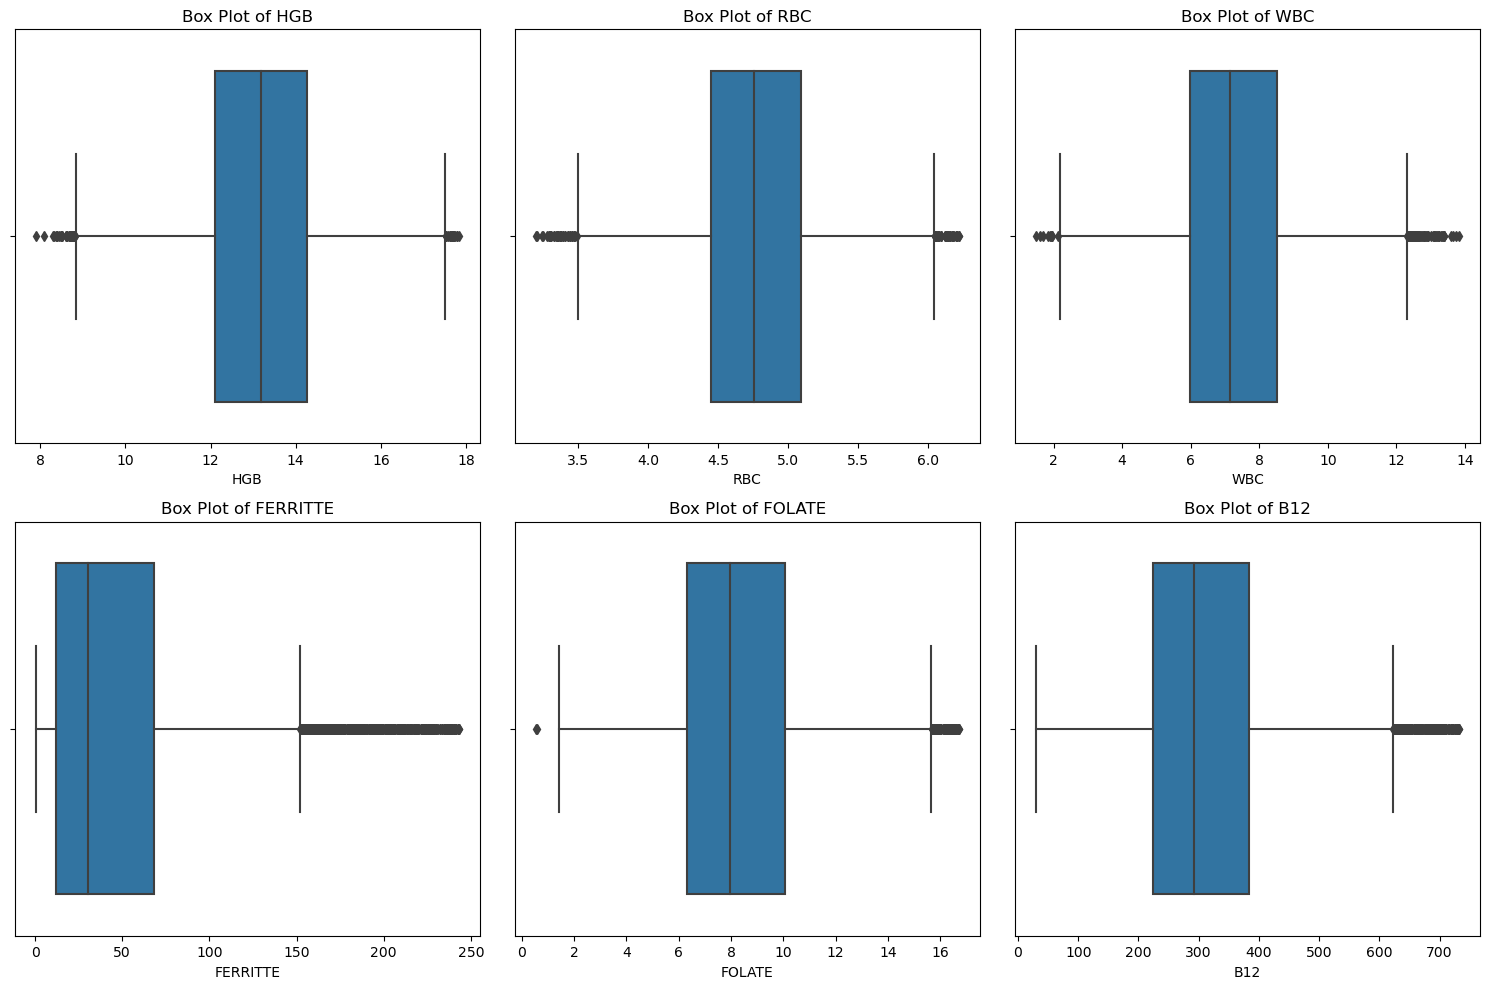

In [16]:
# Selecting a few key features for histograms
features_to_plot = ['HGB', 'RBC', 'WBC', 'FERRITTE', 'FOLATE', 'B12']
# Creating box plots for the selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cleaned[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

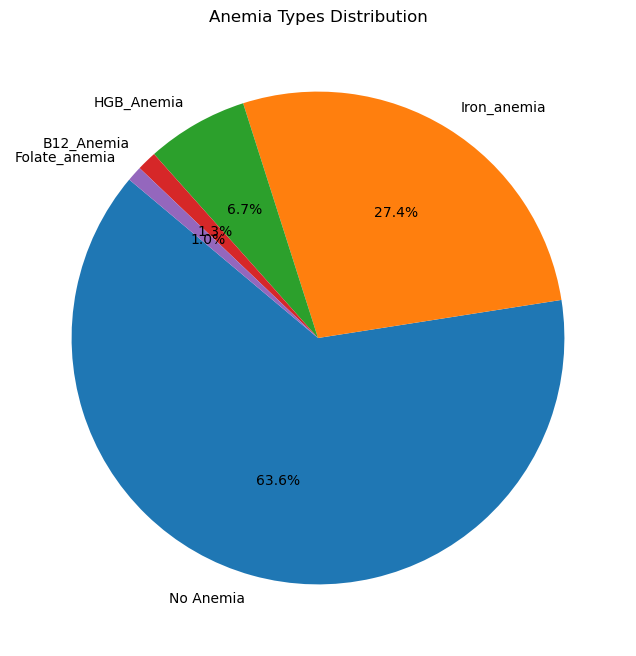

In [17]:
anemia_types = ['No Anemia','HGB_Anemia', 'Iron_anemia', 'Folate_anemia', 'B12_Anemia']
anemia_mapping = {0:'No Anemia', 1:'HGB_Anemia', 2:'Iron_anemia', 3:'Folate_anemia',
                 4:'B12_Anemia'}
category_counts = df['All_Class'].replace(anemia_mapping).value_counts()
# Pie chart for target columns(types of anemia)
plt.figure(figsize=(20, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Anemia Types Distribution')
plt.show()

# **4. Data Preprocessing** <a class="anchor" id="21"></a> 
 *4.1 Resampling* <a class="anchor" id="21"></a>



In [18]:
target =Counter(df['All_Class'])
target

Counter({0: 9672, 2: 4175, 1: 1015, 4: 198, 3: 152})

In [19]:
X = df.drop('All_Class',axis=1)
y = df['All_Class']

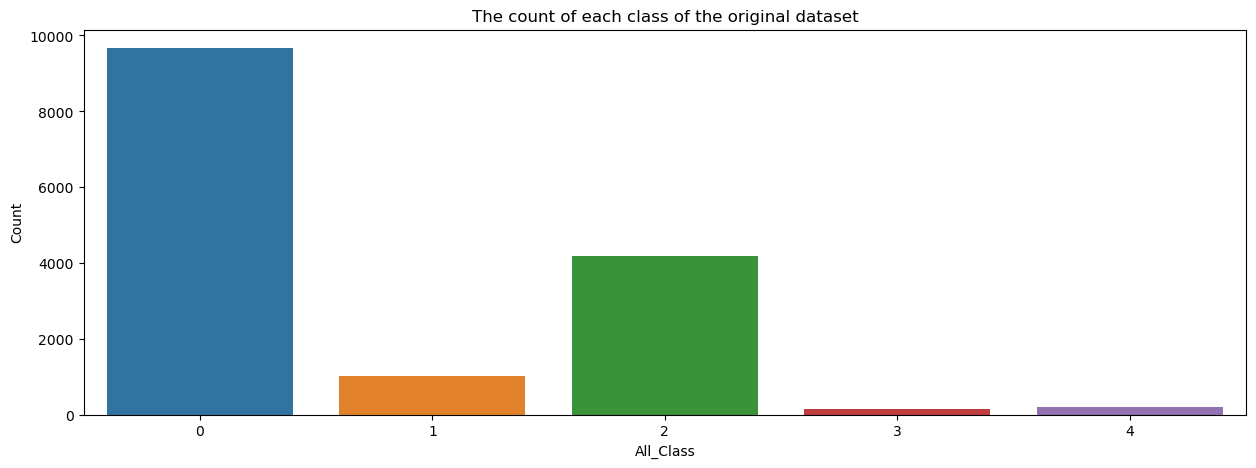

In [20]:
counting = y.value_counts()
plt.figure(figsize=(15,5))
sns.barplot(x=counting.index, y=counting)
plt.ylabel("Count")
plt.title("The count of each class of the original dataset")
plt.show()

In [21]:
sm = SMOTE(random_state=42)
X_resampled , y_resampled = sm.fit_resample(X,y)

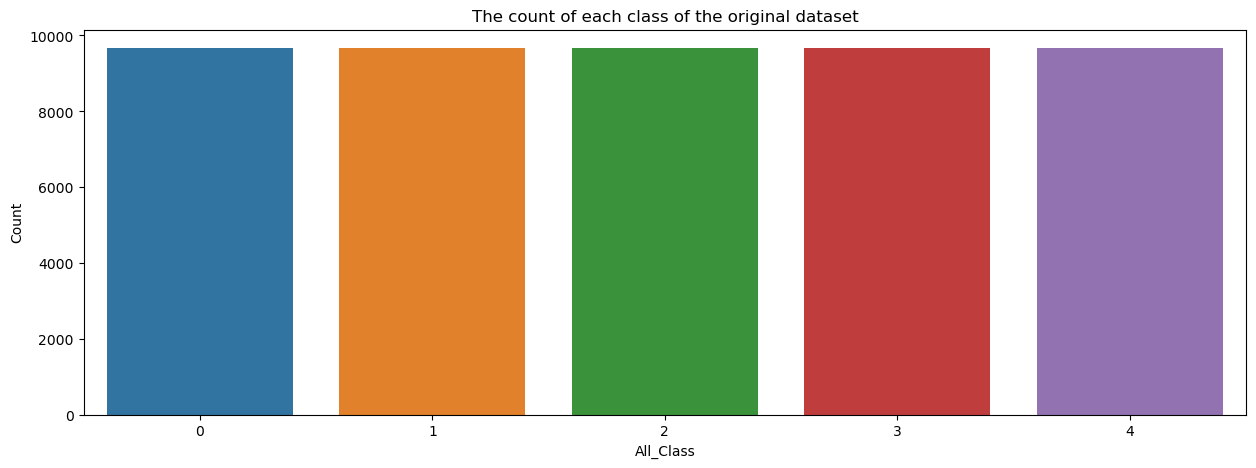

In [22]:
counting = y_resampled.value_counts()
plt.figure(figsize=(15,5))
sns.barplot(x=counting.index, y=counting)
plt.ylabel("Count")
plt.title("The count of each class of the original dataset")
plt.show()

In [23]:
y_resampled.value_counts()

All_Class
4    9672
3    9672
2    9672
1    9672
0    9672
Name: count, dtype: int64

In [24]:
print("Counting of samples:", len(y_resampled))


Counting of samples: 48360


 *4.2 Feature selection* <a class="anchor" id="21"></a>


In [25]:
from sklearn.feature_selection import SelectKBest, chi2

SelKBest = SelectKBest(chi2, k=15)
X_scaled = SelKBest.fit_transform(X_resampled, y_resampled)
print("The new shape is:", X_scaled.shape)
selected_features = X_resampled.columns[SelKBest.get_support()].to_list()



The new shape is: (48360, 15)


In [26]:
print(selected_features)

['HGB', 'HCT', 'MCV', 'MCH', 'PLT', 'SD', 'SDTSD', 'TSD', 'FERRITTE', 'FOLATE', 'B12', 'HGB_Anemia_Class', 'Iron_anemia_Class', 'Folate_anemia_class', 'B12_Anemia_class']


 *4.3 Normalizing* <a class="anchor" id="21"></a>


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_scaled)
X_normalized = pd.DataFrame(X_normalized, columns=selected_features)



In [28]:
X_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
HGB,48360.0,9.967580e-16,1.00001,-4.470392,-0.526573,0.033262,0.462815,5.837785
HCT,48360.0,0.000000e+00,1.00001,-5.084517,-0.510161,0.019861,0.507516,5.905886
MCV,48360.0,-2.821013e-17,1.00001,-4.198199,-0.495344,0.055701,0.519163,4.797585
MCH,48360.0,-1.260053e-15,1.00001,-4.386555,-0.461564,0.103760,0.541234,31.946912
PLT,48360.0,-1.927692e-16,1.00001,-2.305387,-0.642037,-0.089665,0.518170,15.734573
SD,48360.0,1.410507e-16,1.00001,-1.657082,-0.651830,-0.105376,0.414548,8.887108
SDTSD,48360.0,-2.632946e-16,1.00001,-2.816435,-0.686671,0.027466,0.689591,6.686364
TSD,48360.0,-1.316473e-16,1.00001,-1.519983,-0.604518,-0.154499,0.264992,4.203992
FERRITTE,48360.0,7.052533e-17,1.00001,-0.495489,-0.445533,-0.355535,-0.009741,47.396710
FOLATE,48360.0,1.504540e-16,1.00001,-1.862217,-0.741353,-0.098907,0.521455,11.369843


In [29]:
# Splitting the dataset into X and y
X, y = X_normalized,y_resampled

# splitting the data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
print("Length of X train:", len(X_train))
print("Length of X test:", len(X_test))
print("Length of y train:", len(y_train))
print("Length of y test:", len(y_test))

Length of X train: 33852
Length of X test: 14508
Length of y train: 33852
Length of y test: 14508


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    No Anemia     1.0000    1.0000    1.0000      2883
   HGB_Anemia     1.0000    1.0000    1.0000      2850
  Iron_anemia     1.0000    1.0000    1.0000      2964
Folate_anemia     1.0000    1.0000    1.0000      2896
   B12_Anemia     1.0000    1.0000    1.0000      2915

     accuracy                         1.0000     14508
    macro avg     1.0000    1.0000    1.0000     14508
 weighted avg     1.0000    1.0000    1.0000     14508



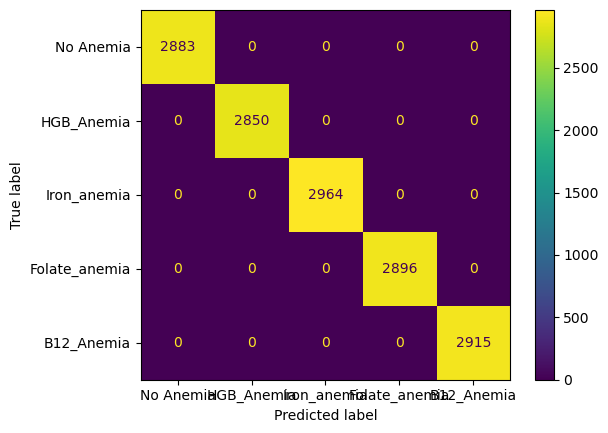

In [30]:
class_names = ['No Anemia','HGB_Anemia', 'Iron_anemia', 'Folate_anemia', 'B12_Anemia']
# Define the logistic regression model
log_reg = LogisticRegression(solver='liblinear')

# Define hyperparameter grid for grid search
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}

# Perform grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_log_reg = grid_search.best_estimator_

# Fit the best model to the data
best_log_reg.fit(X_train, y_train)

# Make predictions
y_pred = best_log_reg.predict(X_test)

# Accuracy score
log_reg_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", log_reg_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names,digits=4)
print("Classification Report:")
print(class_report)

from sklearn import metrics

cm=confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=class_names)

cm_display.plot()
plt.show()


In [31]:
y_train_pred = best_log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [32]:
print(f'Training Accuracy of the best model: {train_accuracy}')


Training Accuracy of the best model: 1.0


In [30]:
# Hyperparameters specifications
Cs = [0.001, 0.01, 1, 5, 10]
kernels = ['rbf', 'linear', 'sigmoid']

# Preparaing training settings
best_accuracy = 0
best_model4 = None

# Training the model with Fine Tuning
for C in Cs:
    for ker in kernels:
        # Building the model
        Support_Vector = SVC(C=C, kernel=ker)
        Support_Vector.fit(X_train,y_train)
        prediction = Support_Vector.predict(X_test)
        
        # Evaluating
        score = accuracy_score(y_test, prediction)

        print(f"C={C}, kernel={ker}")
        print(f"Accuracy: {score * 100}\n")

        # Keep track of the best model
        if score > best_accuracy:
            best_accuracy = score
            best_model4 = Support_Vector
                
print(f"Best Accuracy: {best_accuracy}")



C=0.001, kernel=rbf
Accuracy: 99.35897435897436

C=0.001, kernel=linear
Accuracy: 100.0

C=0.001, kernel=sigmoid
Accuracy: 99.98621450234354

C=0.01, kernel=rbf
Accuracy: 99.75875379101186

C=0.01, kernel=linear
Accuracy: 100.0

C=0.01, kernel=sigmoid
Accuracy: 98.69037772263579

C=1, kernel=rbf
Accuracy: 99.98621450234354

C=1, kernel=linear
Accuracy: 100.0

C=1, kernel=sigmoid
Accuracy: 96.86379928315412

C=5, kernel=rbf
Accuracy: 99.98621450234354

C=5, kernel=linear
Accuracy: 100.0

C=5, kernel=sigmoid
Accuracy: 97.33250620347394

C=10, kernel=rbf
Accuracy: 99.98621450234354

C=10, kernel=linear
Accuracy: 100.0

C=10, kernel=sigmoid
Accuracy: 97.46346843121036

Best Accuracy: 1.0


In [39]:
print(f"Best Model: {best_model4}")


Best Model: SVC(C=0.001, kernel='linear')


Classification Report:
               precision    recall  f1-score   support

    No Anemia     1.0000    1.0000    1.0000      2883
   HGB_Anemia     1.0000    1.0000    1.0000      2850
  Iron_anemia     1.0000    1.0000    1.0000      2964
Folate_anemia     1.0000    1.0000    1.0000      2896
   B12_Anemia     1.0000    1.0000    1.0000      2915

     accuracy                         1.0000     14508
    macro avg     1.0000    1.0000    1.0000     14508
 weighted avg     1.0000    1.0000    1.0000     14508



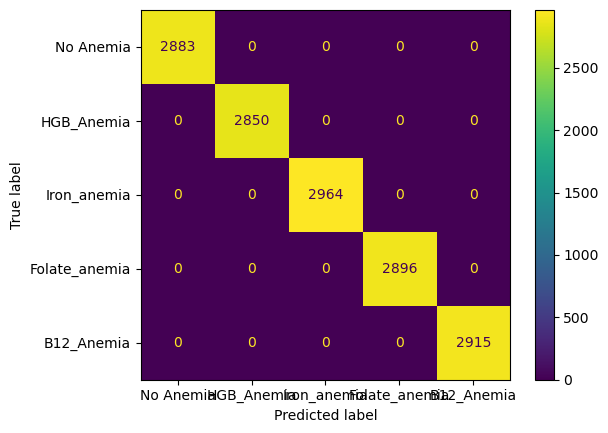

In [42]:
# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names,digits=4)
print("Classification Report:")
print(class_report)

from sklearn import metrics

cm=confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=class_names)

cm_display.plot()
plt.show()

In [40]:
y_train_pred = best_model4.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [41]:
print(f'Training Accuracy of the best model: {train_accuracy}')

Training Accuracy of the best model: 1.0


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    No Anemia     1.0000    1.0000    1.0000      2883
   HGB_Anemia     1.0000    1.0000    1.0000      2850
  Iron_anemia     1.0000    1.0000    1.0000      2964
Folate_anemia     1.0000    1.0000    1.0000      2896
   B12_Anemia     1.0000    1.0000    1.0000      2915

     accuracy                         1.0000     14508
    macro avg     1.0000    1.0000    1.0000     14508
 weighted avg     1.0000    1.0000    1.0000     14508



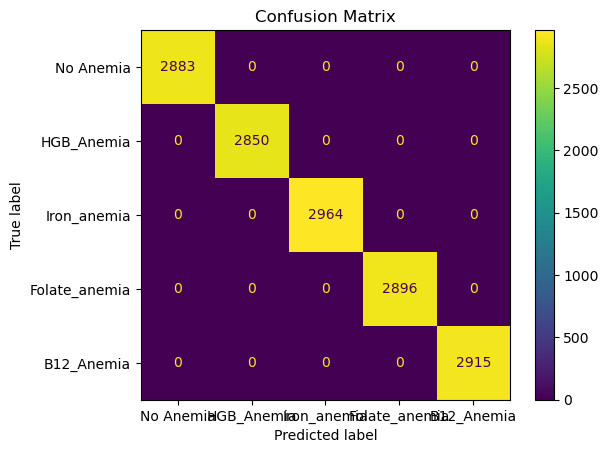

In [35]:
# Define the XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()

# Define hyperparameter grid for grid search
parameters = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5],
    'gamma': [0, 1, 2]
}

# Perform grid search
grid_search_xgb = GridSearchCV(xgb_classifier, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search_xgb.best_params_)

# Fit the best model to the data
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred = best_xgb.predict(X_test)

# Accuracy score
xgb_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", xgb_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'SGD Classifier', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Extra trees', 'MLP'],
    'Score': [log_reg_acc, best_model4, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)